In [15]:
import cv2
import os
import numpy as np
from PIL import Image
#限制对比度自适应直方图均衡
def clahe(image):
    b, g, r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    b = clahe.apply(b)
    g = clahe.apply(g)
    r = clahe.apply(r)
    image_clahe = cv2.merge([b, g, r])
    return image_clahe

def operate(currentPath, filename, targetPath):
    # 读取图像
    image = Image.open(currentPath)
    image_cv = cv2.imread(currentPath)
    # image.show()
    img_noise = clahe(image_cv) 
    cv2.imwrite(targetPath+'/'+filename,img_noise )
    #img_noise.save(targetPath+filename)

data_train = 'Alzheimer_s Dataset/train' 
for parent, dirnames, filenames in os.walk(data_train):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-train/clahe/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)

data_test = 'Alzheimer_s Dataset/test' 
for parent, dirnames, filenames in os.walk(data_test):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-test/clahe/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)

filename is: mildDem0.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem0.jpg
filename is: mildDem1.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem1.jpg
filename is: mildDem10.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem10.jpg
filename is: mildDem100.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem100.jpg
filename is: mildDem101.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem101.jpg
filename is: mildDem102.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem102.jpg
filename is: mildDem103.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem103.jpg
filename is: mildDem104.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem104.jpg
filename is: mildDem105.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem105.jpg
filename is: mildDem106.jpg
the full n

In [16]:
train_root  = "Alzheimer_s Dataset/NB-train/clahe"
test_root = "Alzheimer_s Dataset/NB-test/clahe"

In [17]:
batch_size = 5

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


4


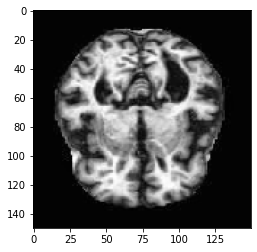

In [18]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [19]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 36, 36, 32)       

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=100)

Epoch 1/100
1025/1025 [==============================] - 91s 88ms/step - loss: 1.7898 - accuracy: 0.4753
Epoch 2/100
1025/1025 [==============================] - 89s 87ms/step - loss: 1.0515 - accuracy: 0.5188
Epoch 3/100
1025/1025 [==============================] - 93s 91ms/step - loss: 0.9962 - accuracy: 0.5091
Epoch 4/100
1025/1025 [==============================] - 93s 91ms/step - loss: 1.0417 - accuracy: 0.5021
Epoch 5/100
1025/1025 [==============================] - 96s 94ms/step - loss: 0.9890 - accuracy: 0.5214
Epoch 6/100
1025/1025 [==============================] - 90s 87ms/step - loss: 0.9195 - accuracy: 0.5604
Epoch 7/100
1025/1025 [==============================] - 84s 82ms/step - loss: 0.8994 - accuracy: 0.5581
Epoch 8/100
1025/1025 [==============================] - 84s 82ms/step - loss: 0.8850 - accuracy: 0.5640
Epoch 9/100
1025/1025 [==============================] - 85s 83ms/step - loss: 0.8784 - accuracy: 0.5739
Epoch 10/100
1025/1025 [==============================]

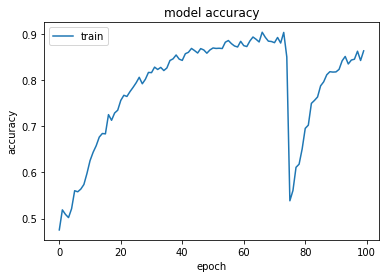

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

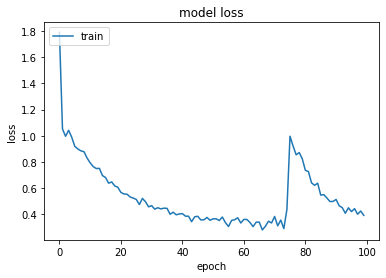

In [22]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

256/256 [==============================] - 11s 40ms/step


<AxesSubplot:>

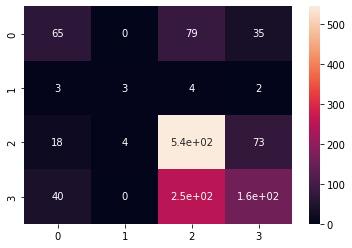

In [23]:
import seaborn as sns
import numpy as np 
predict_x = model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [24]:
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.053166536356528536


In [25]:
from keras.models import Model


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[10][0][0].reshape(1,150,150,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 0s 403ms/step


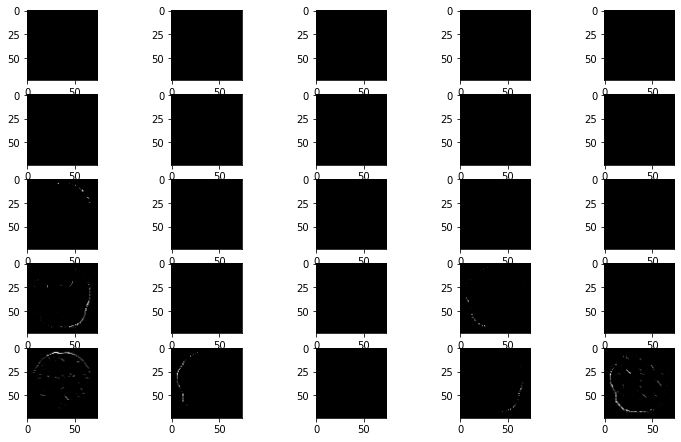

In [26]:
display_activation(activations, 5, 5, 1)